<a href="https://colab.research.google.com/github/carolinampessoa/TechChallengeFase1/blob/main/TechChallengeFase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas



In [ ]:
# Bibliotecas para leitura e carregamento de dataset do Kaggle
import kagglehub
import pandas as pd
import os
# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
# Bibliotecas para ajuste de dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Bibliotecas para treinamento de modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Bibliotecas para validação de modelos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import statsmodels.api as sm

**Passo 1: Exploração de dados**

Baixando a base de dados e explorando suas características


In [ ]:
path = kagglehub.dataset_download("mirichoi0218/insurance");
df = pd.read_csv(os.path.join(path, "insurance.csv"));

# Exibindo as primeiras linhas e formato do DataFrame
print(df.head());
print("Formato do dataset (linhas, colunas):", df.shape);

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Formato do dataset (linhas, colunas): (1338, 7)


Base de dados de composta por 1338 registros e 7 colunas, sendo 6 variáveis de entrada (idade, genero, IMC, número de filhos, fumante e região) e uma váriavel de saída (custos - variável target).

In [ ]:
# Características do DataFrame
print("\nInformações do DataFrame:");
print(df.info());  # Tipos de dados: categóricas(sex, smoker, region), inteiro (age, children) e float (BMI, charges).


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


 Tipos de dados presentes no dataset: categóricas (sex, smoker, region), inteiros (age, children) e float (BMI, charges).

 Não existem valores nulos na base de dados.


Estatísticas descritivas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Distribuição das variáveis  numéricas:


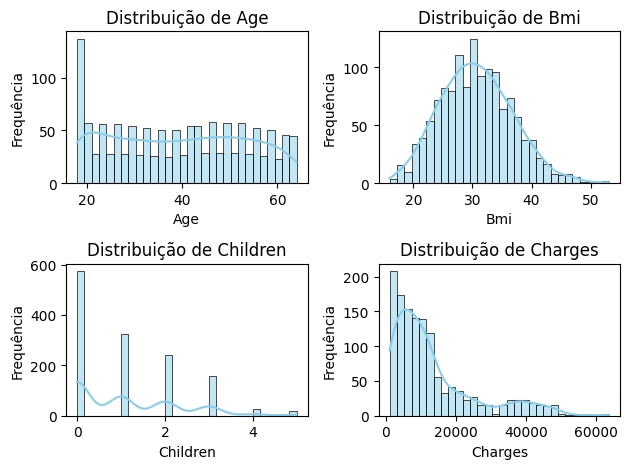

In [19]:
print("\nEstatísticas descritivas:")
print(df.describe())
print("\nDistribuição das variáveis  numéricas:")
num_attribs = list(df.select_dtypes(include=['number']))

for i, var in enumerate(num_attribs):
    plt.subplot(2, 2, i + 1) # Cria uma grade de 2x2 subplots
    sns.histplot(df[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequência')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

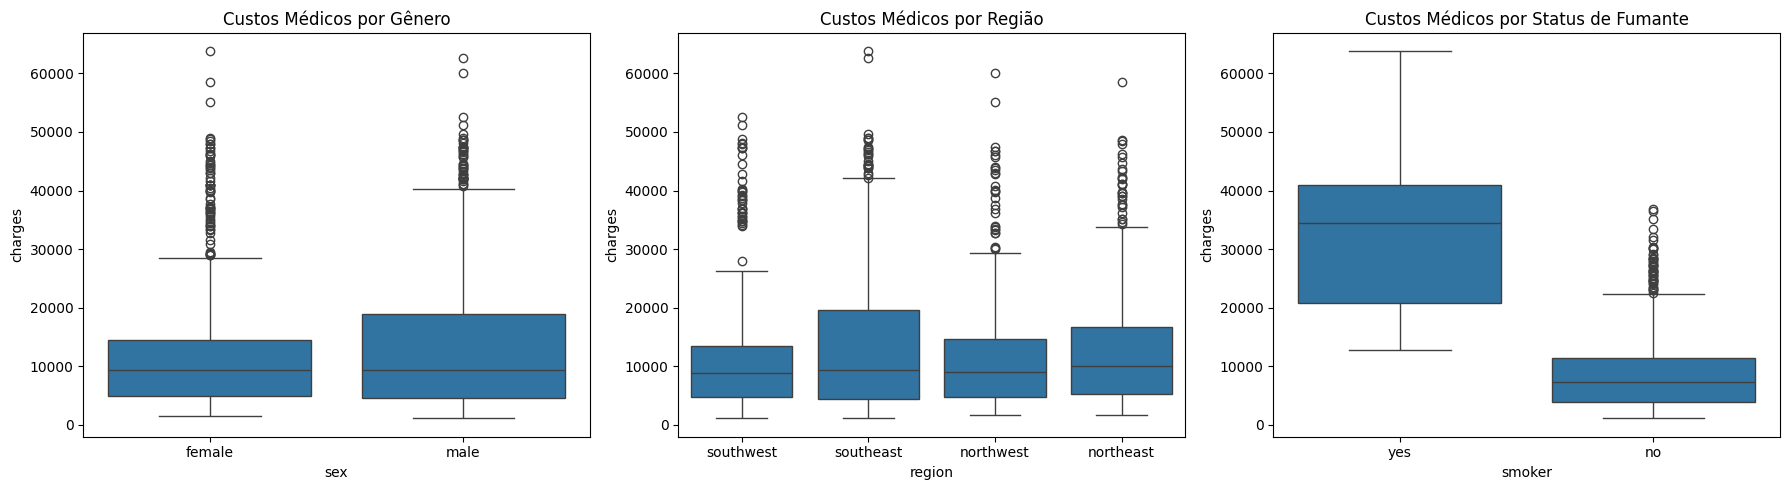

Insights das métricas e análises de distribuição:

* Custos: grande maioria das pessoas com custos médicos entre 1k e 20k. Distribuição de custos altamente assimétrica à direita, com alguns pacientes incorrendo em custos significativamente altos (mais de R$ 50k). Isso pode indicar a presença de casos especiais, como pacientes com doenças crônicas ou tratamentos caros. Pode ser necessário um tratamento específico para lidar com esses outliers;
* Idade: distribuição relativamente uniforme entre 18 e 64 anos. Média próxima da mediana, indicando certa simetria. A amostra representa bem diferentes faixas etárias sem um viés muito forte para jovens ou idosos (embora seja limitada a 64 anos).
* BMI: Dados variando entre 15.96 (muito abaixo do peso) e 53,13 (obesidade severa). A distribuição é levemente assimétrica à direita, indicando a presença de pacientes com IMC significativamente alto.
* Filhos: distribuição bastante assimétrica à direita, ou seja, a grande maioria das pessoas avaliadas tem poucos filhos.

Avaliando a correlação individual das variáveis de entrada numéricas com a variável target:

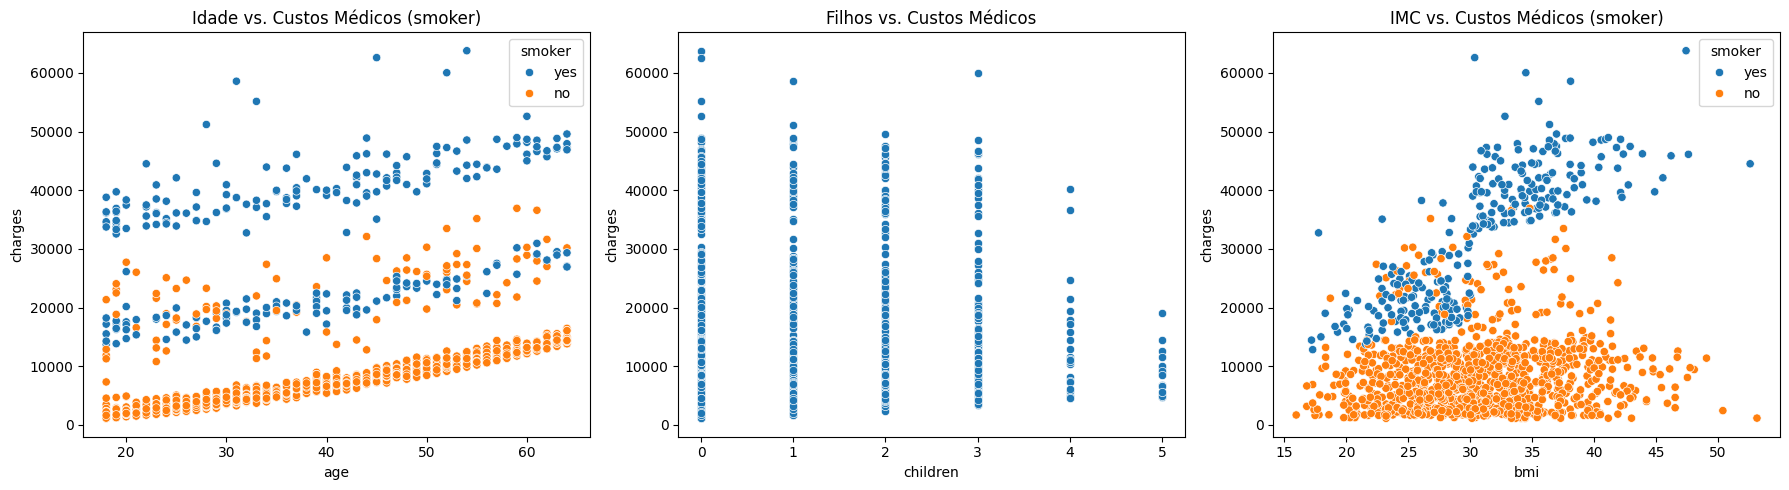

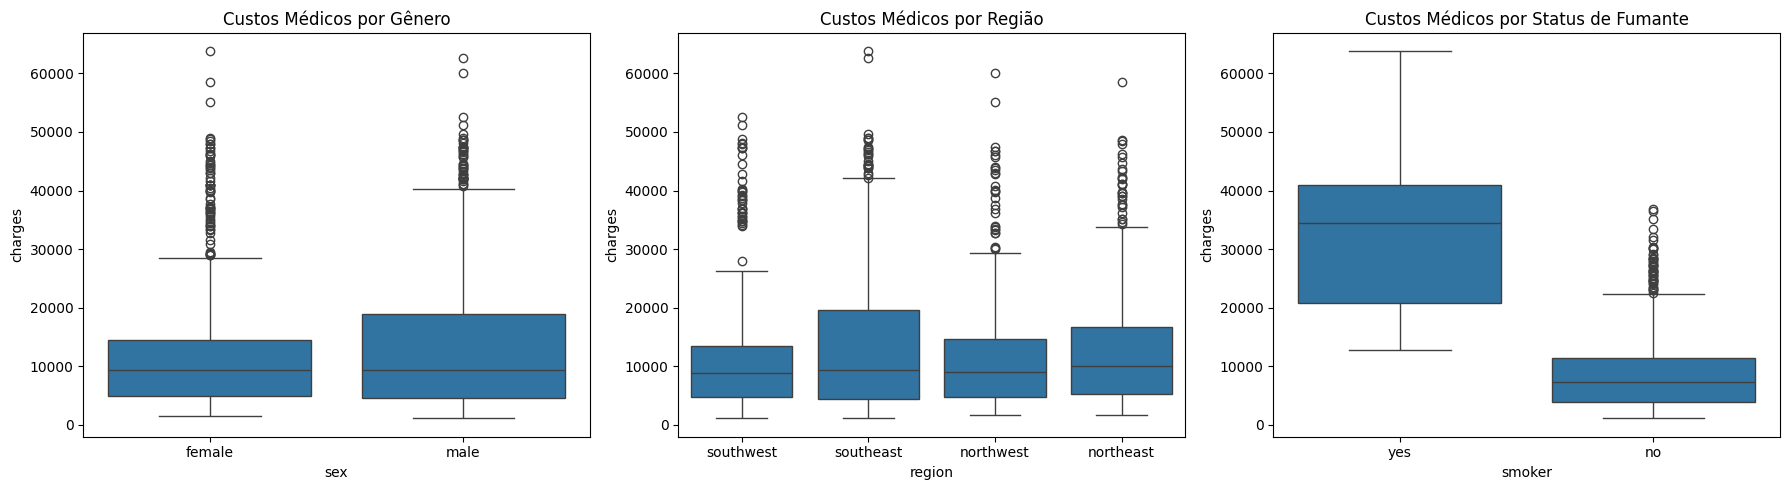

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

# 1. Scatterplot: Idade vs. Custos Médicos
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[0])
axes[0].set_title("Idade vs. Custos Médicos (smoker)")

# 2. Scatterplot: Filhos vs. Custos Médicos
sns.scatterplot(x='children', y='charges', data=df, ax=axes[1])
axes[1].set_title("Filhos vs. Custos Médicos")

# 3. Scatterplot: BMI vs. Custos Médicos
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[2])
axes[2].set_title("IMC vs. Custos Médicos (smoker)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

# 1. Boxplot: Custos Médicos por Genero
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0])
axes[0].set_title("Custos Médicos por Gênero")

# 2. Boxplot: Custos Médicos por Região
sns.boxplot(x='region', y='charges', data=df, ax=axes[1])
axes[1].set_title("Custos Médicos por Região")

# 3. Boxplot: Custos Médicos por Status de Fumante
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[2])
axes[2].set_title("Custos Médicos por Status de Fumante")

plt.tight_layout()
plt.show()


Conclusões gerais e principais insights da análise de dados:

* O status de fumante (smoker) é, de longe, a variável com o impacto mais claro e significativo nos custos médics;
* A idade é outro preditor robusto, com custos aumentando consistentemente à medida que a pessoa envelhece;
* O IMC tem uma relação positiva com os custos, mas com uma variabilidade considerável. Sua influência pode ser mais aparente quando combinada com outros fatores (como fumar);
* O número de filhos, por si só, não parece ser um fator determinante para os custos do plano de saúde;
* A região onde o paciente reside também tem um impacto discernível, com o Southeast mostrando custos consistentemente mais altos. Isso pode indicar diferenças socioeconômicas, de estilo de vida ou de acesso à saúde;
* O gênero, isoladamente, parece ter um impacto marginal nos custos, com uma pequena diferença na mediana, mas sem grande poder explicativo;
* Todos os box plots reforçam a natureza assimétrica dos charges (com a cauda longa para cima, indicando muitos outliers de alto custo);
* A visualização Idade vs. Custos (smoker) e IMC vs. Custos (smoker) demonstra a importância de explorarmos as interações entre as variáveis;
* A presença de outliers sugere a necessidade de técnicas robustas ou transformações nos dados para modelagem eficaz.

**Passo 2: Pré-processamento de dados**

Limpeza de dados: conforme avaliado anteriormente, a base de dados não possui dados nulos. Caso contrário, poderia ser usada técnicas como substituição pela média ou mediana e criado um pipeline específico para isso com a classe

In [ ]:
# Passo 2: Pré-processamento de dados